In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import NMF

# Exercício 1
*Objetivo: explicar o que é uma matriz de documentos por palavras*

No código a seguir:

1. O que significa cada linha e cada coluna que compõe a matriz x que foi impressa? 
1. Existem palavras que, de acordo com a matriz x, tipicamente aparecem juntas em documentos deste corpus? Quais são?

In [2]:
texto1 = "adoro festa junina"
texto2 = "odeio festa junina"
texto3 = "big brother brasil é legal"
texto4 = "big brother brasil é chato"
corpus = [texto1, texto2, texto3, texto4]
vectorizer = CountVectorizer(binary=True)
x = vectorizer.fit_transform(corpus)
print(x.toarray())

[[1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 1]
 [0 1 1 1 0 0 0 1 0]
 [0 1 1 1 1 0 0 0 0]]


1. O array coloca as palavras unicas (e com mais de uma letra) em ordem alfabética e ai coloca cada frase em uma linha.

2. Big broder brasil.

# Exercício 2
*Objetivo: explicar o que é uma decomposição com perdas*

Em nosso corpus, temos duas categorias de textos: os que falam de festa junina e os que falam de big brother brasil. 

1. Como seria um vetor correspondente a um documento que tipicamente fala de festa junina?
1. E o correspondente a um documento que tipicamente fala de big brother brasil?
1. Se usássemos somente esses vetores típicos para cada categoria, ao invés dos documentos em si, que tipo de informação nós conservamos? Que tipo de informação nós perdemos? 
1. Ao decompor nossos documentos em vetores prototípicos, houve perda de informação? Justifique.

1. X X X X X 1 1 X X
2. X 1 1 1 X X X X X
3. Conserva o tópico, perde os detalhes

# Exercício 3
*Objetivo: aplicar a representação matricial*

Em nosso processo de decomposição, partimos de uma matriz X, que é de documentos ($d$) por palavras ($p$), ou: $X_{d,p}$

Vamos decompor essa matriz em duas outras matrizes. A primeira delas relaciona documentos a tópicos: $B_{d,t}$

Idealmente, qual deveria ser o conteúdo da matriz B em nosso caso?

[[1 0][1 0][0 1][0 1]]
a matriz B diz quais topicos estao quais documentos.

# Exercício 4
*Objetivo: modelar matematicamente a decomposição usando álgebra matricial*

Na decomposição, gostaríamos de encontrar duas matrizes que, se forem multiplicadas, podem gerar novamente a matriz original. Então, teremos algo como:
$X_{d,p}=B_{d,t} A_{?,?}$

1. Quais devem ser obrigatoriamente as dimensões da matriz A, para que a multiplicação BA seja válida e gere uma matriz com as dimensões de X?
1. O que significa cada elemento da matriz A?



Se sabe o que cada tópico está falando sobre. A matriz A fala quanto cada palavra faz parte de cada tópico.

# Exercício 5
*Objetivo: explicar o erro na decomposição com perdas*

Na decomposição $X=BA$, existem casos em que a multiplicação $BA$ pode não ser igual a $X$. Nesse caso, definimos um erro:

$$
e = ||X-BA||^2
$$

Sabemos que o número de documentos ($d$) e de palavras ($p$) depende somente do dataset, isto é, temos controle apenas sobre o número de tópicos $t$.

Como o valor de $e$ deve se comportar em relação ao valor de $t$?

# Exercício 6
*Objetivo: usar a decomposição do tipo fatoração por matrizes não negativas em nosso toy-corpus*

O código abaixo aplica a fatoração por matrizes não-negativas (Non-Negative Matrix Factorization).

Ele funciona da seguinte forma:
* Recebe X como entrada
* Encontra os coeficientes das matrizes $B$ e $A$ minimizando $e = ||X-BA||^2$
* Todos os coeficientes devem ser maiores ou iguais a zero


1. O que significa o parâmetro n_components? A qual parâmetro ele corresponde na equação do Exercício 4?
1. Como devemos interpretar a saída y? A qual parâmetro y corresponde na equação do Exercício 4?
1. Os resultados mostrados na saída y correspondem a aquilo que você previu no exercício 3? Por que?

In [5]:
nmf = NMF(n_components=2, init='nndsvda')
y = nmf.fit_transform(x)
print(y)

[[0.         0.79016168]
 [0.         0.79016168]
 [0.64232557 0.        ]
 [0.64232557 0.        ]]


O n é o numero de linhas e colunas.

# Exercício 7
*Objetivo: interpretar a representação interna dos componentes em nossa fatoração*

Podemos encontrar o último componente restante de nossa fatoração acessando uma variável interna do modelo:
`print(nmf.components_)`

1. A qual parâmetro da equação do exercício 4 corresponde a matriz em nmf.components_?
1. Como devemos interpretar cada um dos parâmetros dela?
1. Como seria possível mostrar graficamente o quanto cada palavra participa de cada tópico? (se quiser, veja inspirações em https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)



In [6]:
print(nmf.components_)

[[0.         1.55684289 1.55684289 1.55684289 0.77842144 0.
  0.         0.77842144 0.        ]
 [0.63278189 0.         0.         0.         0.         1.26556378
  1.26556378 0.         0.63278189]]


A palavra 0 tem a propriedade de nao estar ligada ao topico zero... Isso é a forma de ver como cada palavra está relacionada com determinado tópico.

# Exercício 8
*Objetivo: aplicar o processo de fatoração para visualizar tópicos em uma coleção*

Aplique o processo de fatoração por NMF para visualizar, em tópicos, a coleção do IMDB. Use dois tópicos e limite o número de palavras no CountVectorizer em poucas centenas (ou então o NMF vai demorar muito a rodar).

Como você interpreta as palavras mais salientes de cada tópico?




In [7]:
df = pd.read_csv('./datasets/IMDB Dataset.csv').sample(1000)
df.head()


,review,sentiment
15968,This silly movie is really fun for the younger...,positive
39999,I have to confess that I am severely disappoin...,negative
20270,It's one of my favorite movies as much because...,positive
6063,It utterly defeats me why Godard is taken so s...,negative
19335,Frank Falenczyk: It isn't that I'm sorry I kil...,negative


In [8]:
n_palavras = 30
n_components = 5
vectorizer = CountVectorizer(binary=True, max_features=n_palavras)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda', max_iter=2000)
y = nmf.fit_transform(X.toarray())
print(y.shape)

(1000, 30)
(1000, 5)


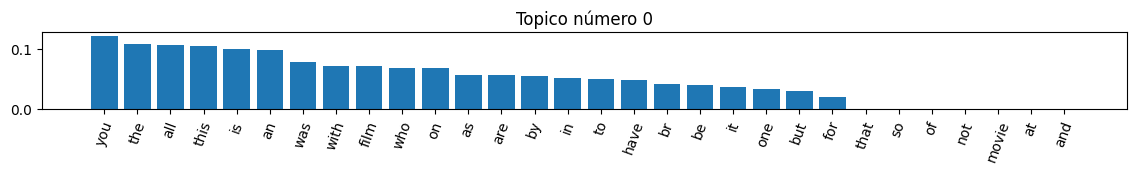

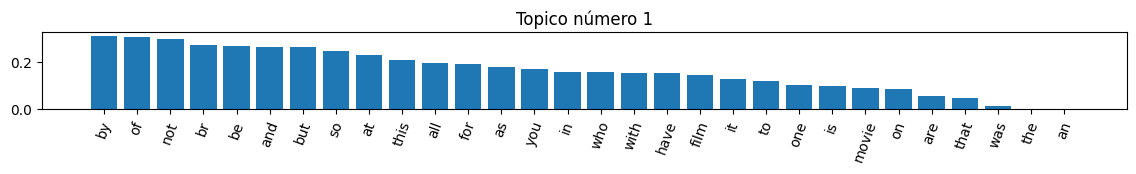

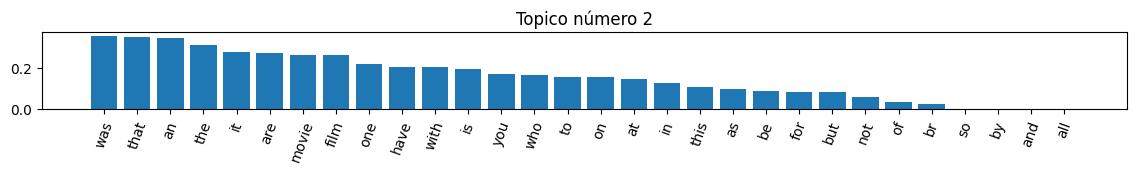

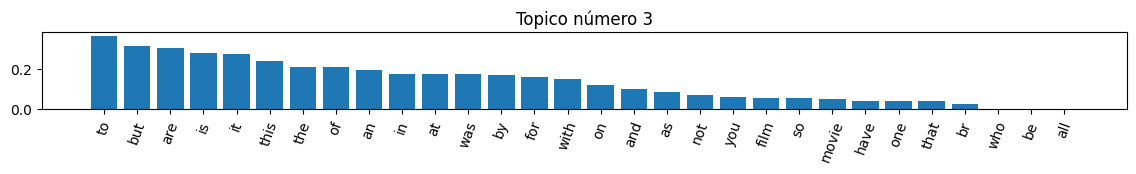

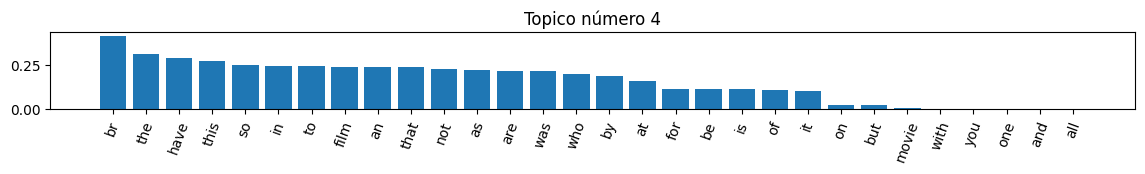

In [9]:
for n in range(n_components):
    tuplas = [ (y[vectorizer.vocabulary_[i],n], i) for i in vectorizer.vocabulary_.keys() ]
    tuplas_ordenadas = sorted(
    tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]
    plt.figure(figsize=(14,1))
    eixo_x = np.arange(n_palavras)
    plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
    plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
    plt.title("Topico número " + str(n))
    plt.show()

# Exercício 9
*Objetivo: comparar classificadores usando tópicos a classificadores usando palavras*

A fatoração faz com que cada palavra seja representada num espaço vetorial de tópicos.

Podemos pensar que o espaço vetorial de tópicos pode levar a classificações mais robustas, uma vez que trata-se de um espaço de dimensão mais baixa e cujo significado é compreensível a nós (analistas).

Compare o desempenho dos classificadores com e sem NMF usando o código abaixo. Como o desempenho do classificador com NMF se comporta quando aumentamos o número de componentes (isto é, o número de tópicos)?

In [13]:
df = pd.read_csv('./datasets/IMDB Dataset.csv')

In [14]:
n_components = 12
X_train, X_test, y_train, y_test= train_test_split(df['review'], df['sentiment'], train_size=0.7)
classificador = Pipeline([
                        ('meu_vetorizador', CountVectorizer(stop_words='english')),
                        ('meu_transformador', NMF(n_components=n_components, init='nndsvda', max_iter=2000)),
                        ('meu_classificador', LogisticRegression(penalty=None, solver='saga', max_iter=10000))
                        ])

classificador.fit(X_train,y_train)
y_pred = classificador.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print(acc)

0.698


# Exercício 10
*Objetivo: comparar os classificadores usando NMF e os que não usam*

Comparando a pipeline de classificadores usando NMF e sem usar NMF:

1. Qual é o tamanho da entrada (dimensão do vetor de entrada) de cada um deles?
1. O que significa cada dimensão no vetor de entrada de cada um deles?
1. Em que situações cada um deles é vantajoso?

